# Sanity Check Music XML conversion

Check that `midi` => `mxl` conversion indeed helps clean up the data.



## Setup


In [1]:
%load_ext autoreload
%autoreload 2


import os
os.chdir('../..')  # so that import works

import pandas as pd
from matplotlib import rcParams

from stefutil import *
from midi_or_mxl import *


pd.set_option('display.max_rows', None)
rcParams['figure.figsize'] = (16, 20)


dnm = 'POP909'
logger = get_logger('MXL Check')
cache = f'Mxl-Check-Cache_{dnm}'



## Compare on statistics

Compare the piece quality of `mid` and `mxl` files, read in by `music21`, on several dimensions



### Extract info

In [2]:
df, read_errs = get_plot_info(dataset_name=dnm, cache=cache)



2023-04-12 21:48:40|[MXL Check]::get_plot_info::midi_or_mxl.py:80:INFO: Loading cached data from /Users/stefanhg/Documents/UMich/Research/Music with NLP/Symbolic-Music-Generation/notebook/pre_process/Mxl-Check-Cache_POP909.pkl... 


### File-Read Error

Some `mid` files couldn't be read by `music21` with a weird key error;
all `mxl` files were read successfully.


In [3]:
mic(read_errs)
df



ic| read_errs: {'mid': 24, 'mxl': 0}


,n_note,n_rest,n_time_sig,n_key_sig,n_tempo,n_bar,durations_note,durations_rest,format
0,1224,913,3,3,3,75,"{1.5: 24, 3.25: 18, 0.25: 516, 0.5: ...","{4.0: 66, 0.75: 139, 0.25: 362, 0.5:...",mid
1,1129,928,3,0,54,122,"{0.25: 425, 5/3: 3, 1.5: 58, 1.25: 7...","{2.0: 85, 1/3: 106, 0.25: 312, 2/3: ...",mid
2,1437,868,3,0,3,69,"{2/3: 131, 10/3: 42, 3.0: 9, 0.5: 21...","{4.0: 50, 2/3: 116, 1.0: 38, 5/3: 24...",mid
3,1680,927,3,0,3,295,"{1/3: 99, 0.25: 295, 0.5: 747, 2/3: ...","{1.0: 289, 0.25: 227, 0.5: 290, 1/6:...",mid
4,1490,1066,3,0,3,255,"{0.25: 273, 1.0: 154, 1/12: 47, 2/3:...","{1.0: 211, 0.75: 3, 2/3: 40, 0.25: 8...",mid
5,1567,1000,3,3,3,260,"{1/3: 603, 1.0: 109, 11/12: 17, 1/6:...","{1.0: 201, 2/3: 252, 0.25: 28, 1/3: ...",mid
6,2559,1033,3,0,3,418,"{0.5: 981, 0.25: 339, 1/3: 62, 1.0: ...","{1.0: 300, 0.25: 144, 5/12: 10, 1/6:...",mid
7,2353,1391,3,0,3,267,"{0.5: 266, 2/3: 412, 0.25: 755, 5/12...","{1.0: 229, 1/3: 332, 0.75: 318, 1/6:...",mid
8,2775,1417,3,0,3,347,"{0.25: 1788, 3.0: 2, 5/12: 118, 2/3:...","{1.0: 113, 0.75: 380, 0.25: 780, 1/1...",mid
9,2460,1705,3,0,3,344,"{0.5: 189, 0.75: 442, 1/3: 674, 1/6:...","{1.0: 146, 0.25: 536, 2/3: 218, 1/12...",mid


### Plot

#### #Notes

Not much difference between `mid` and `mxl` files.

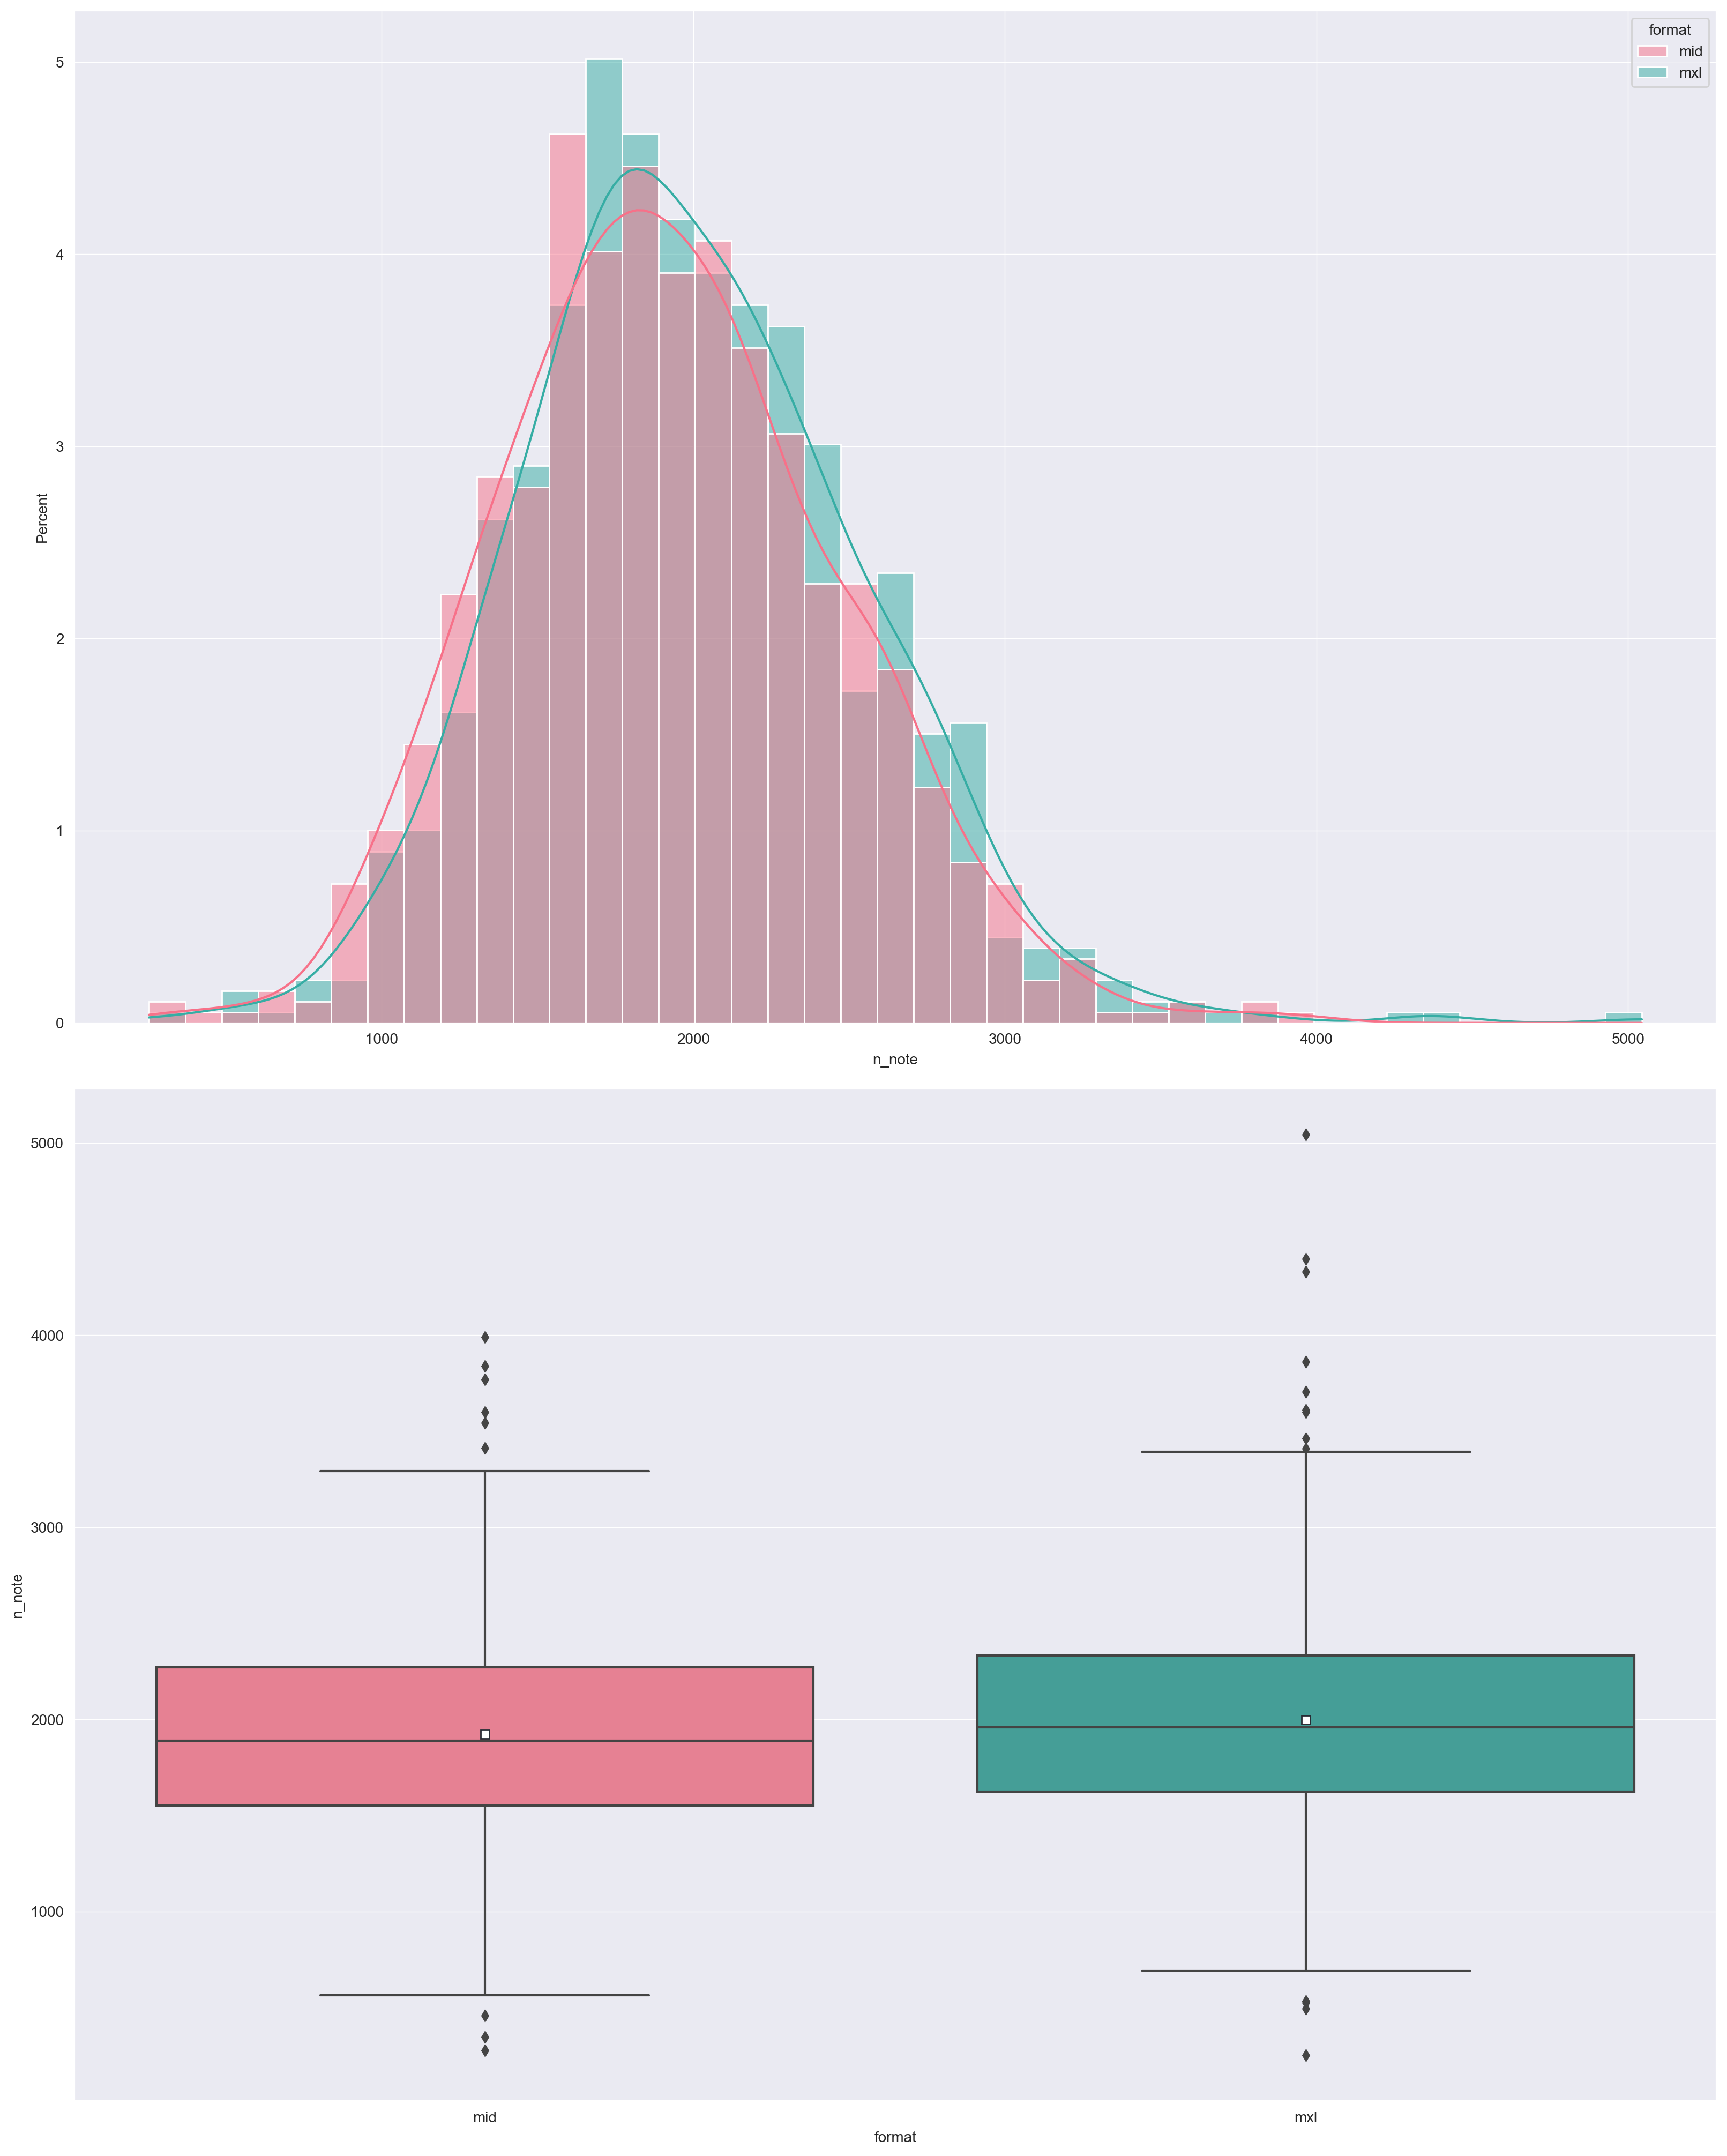

In [4]:
side_by_side_plot(df=df, aspect='n_note');




#### #Rests

`mxl` files have slightly higher mean and wider spread than `midi` files, so not sure conversion helps.


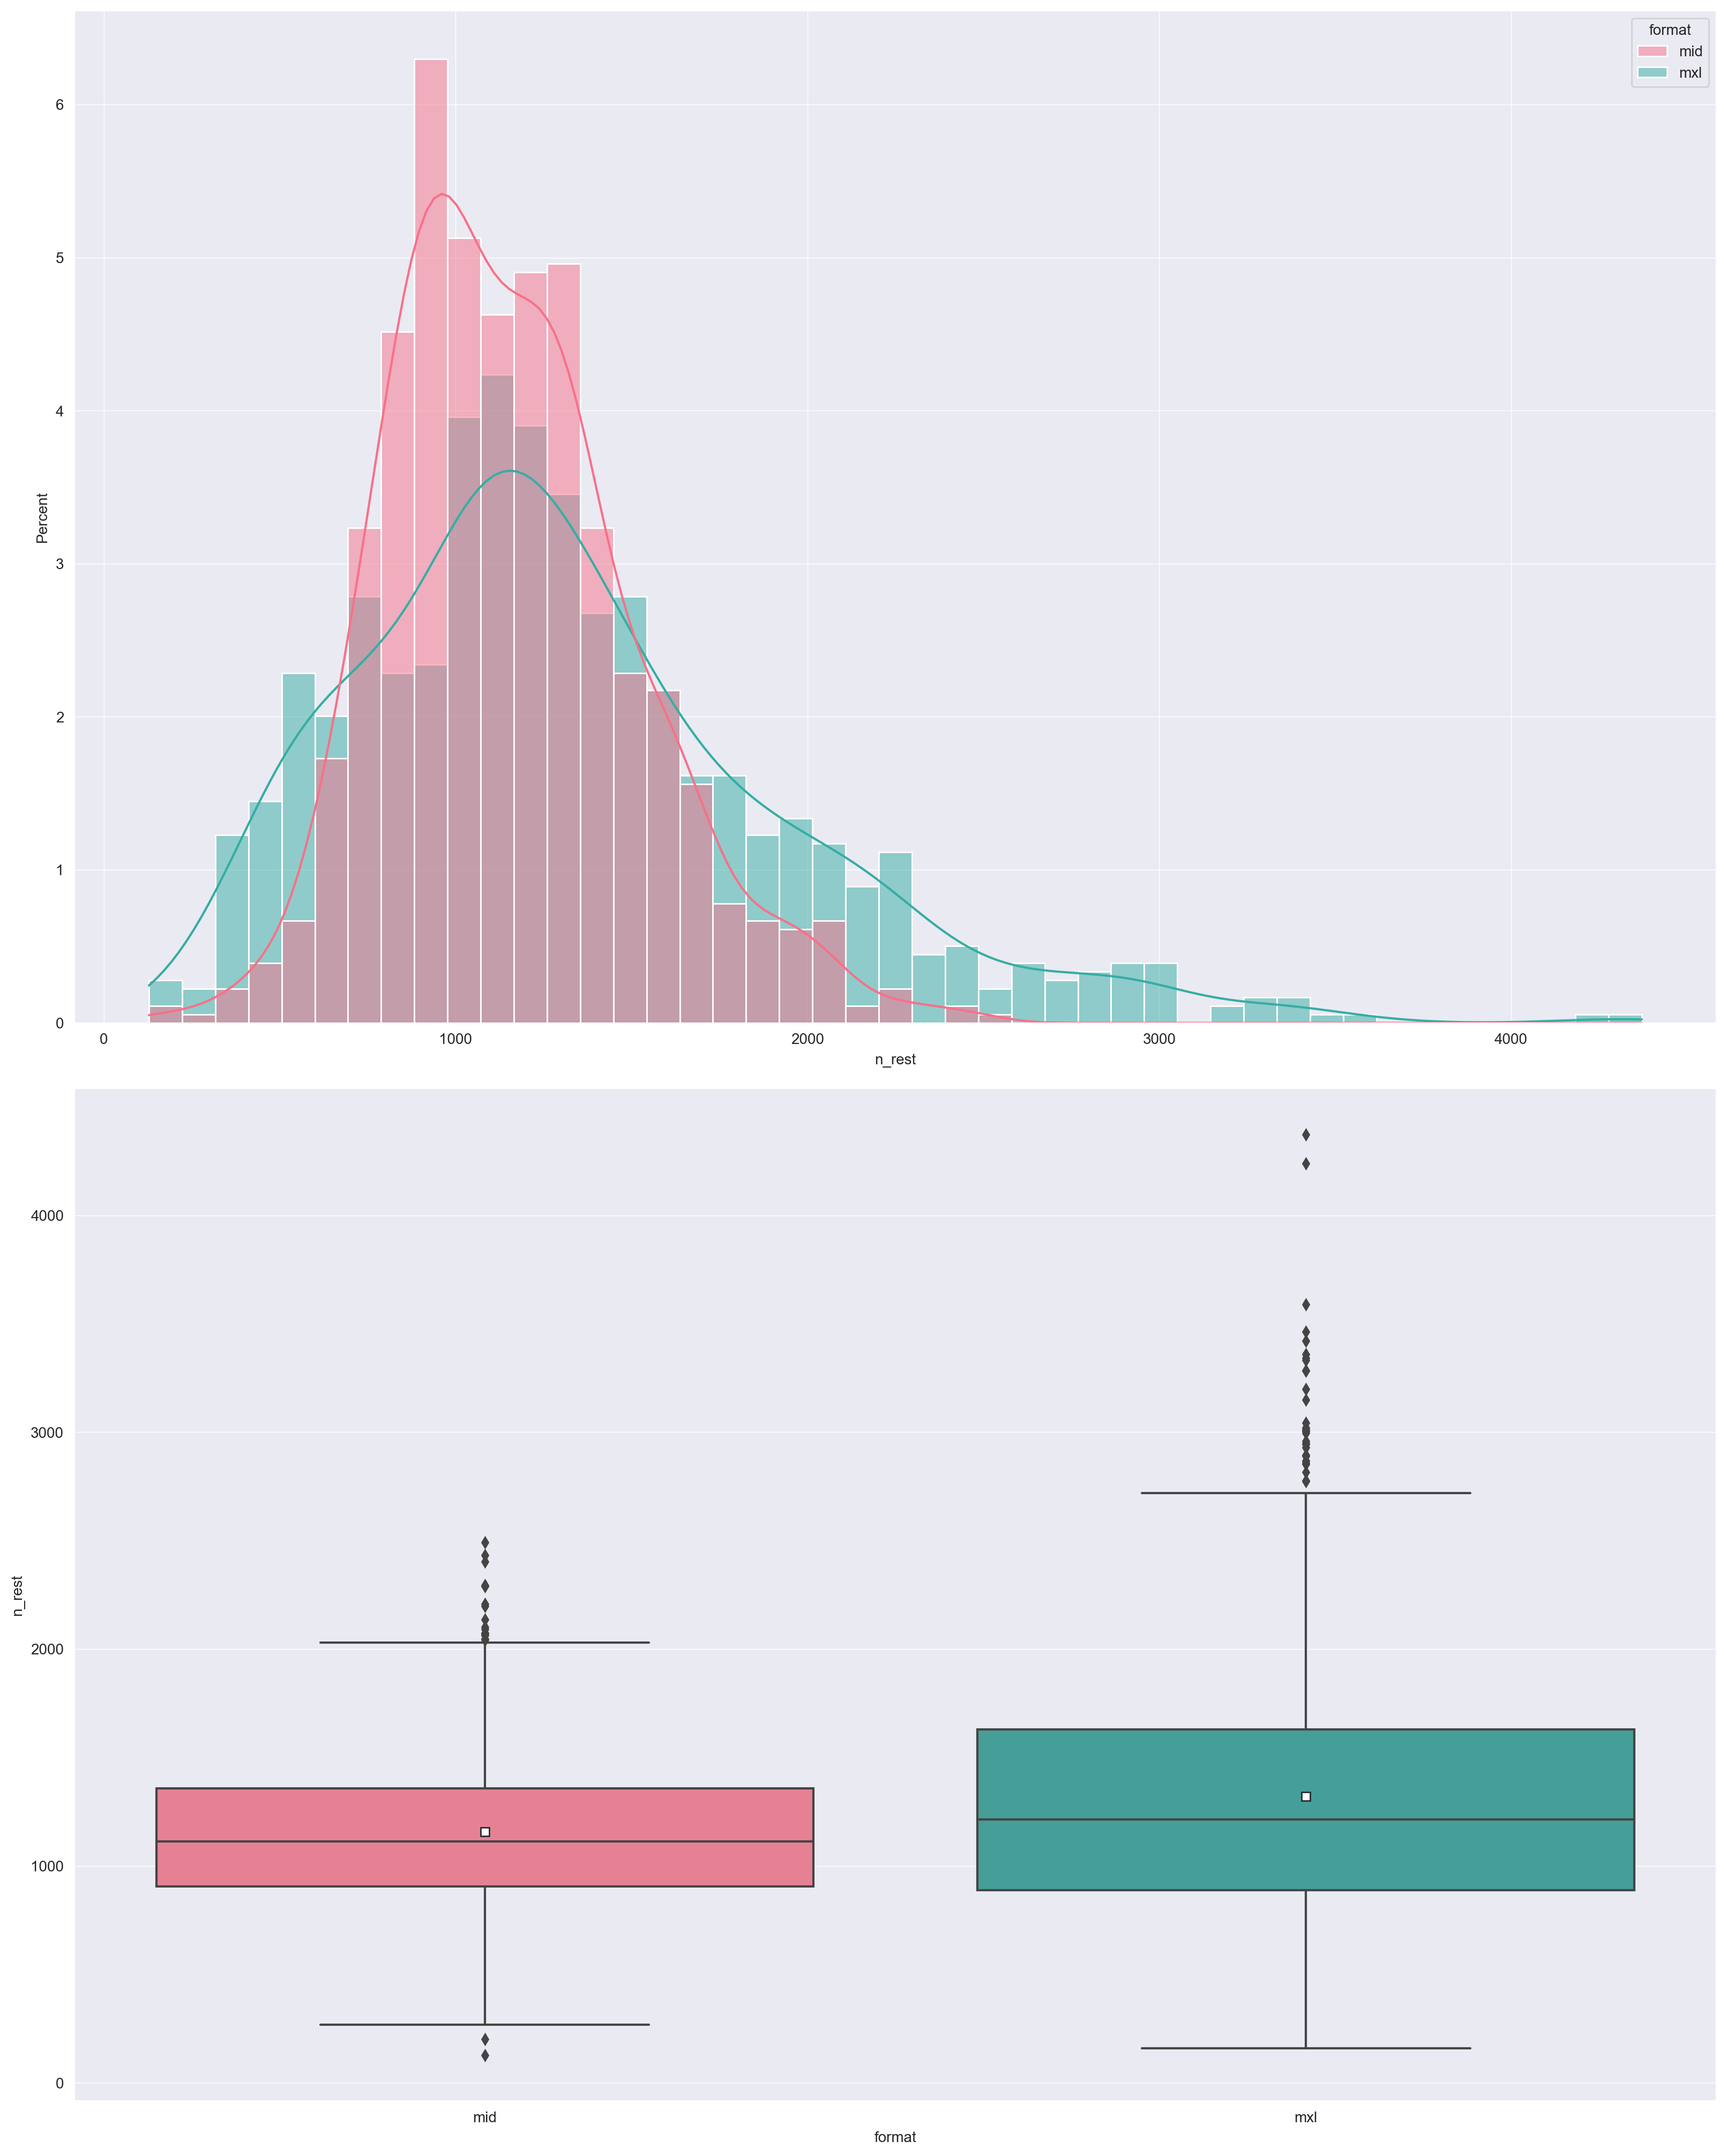

In [5]:
side_by_side_plot(df=df, aspect='n_rest');



#### #Time Signature


Unexpected number for both `mid` and `mxl` files, possibly cos POP909 is in high quality.



format   
mid     3    882
        9      2
        6      1
mxl     4    568
        5    334
        3      6
        6      1
Name: n_time_sig, dtype: int64

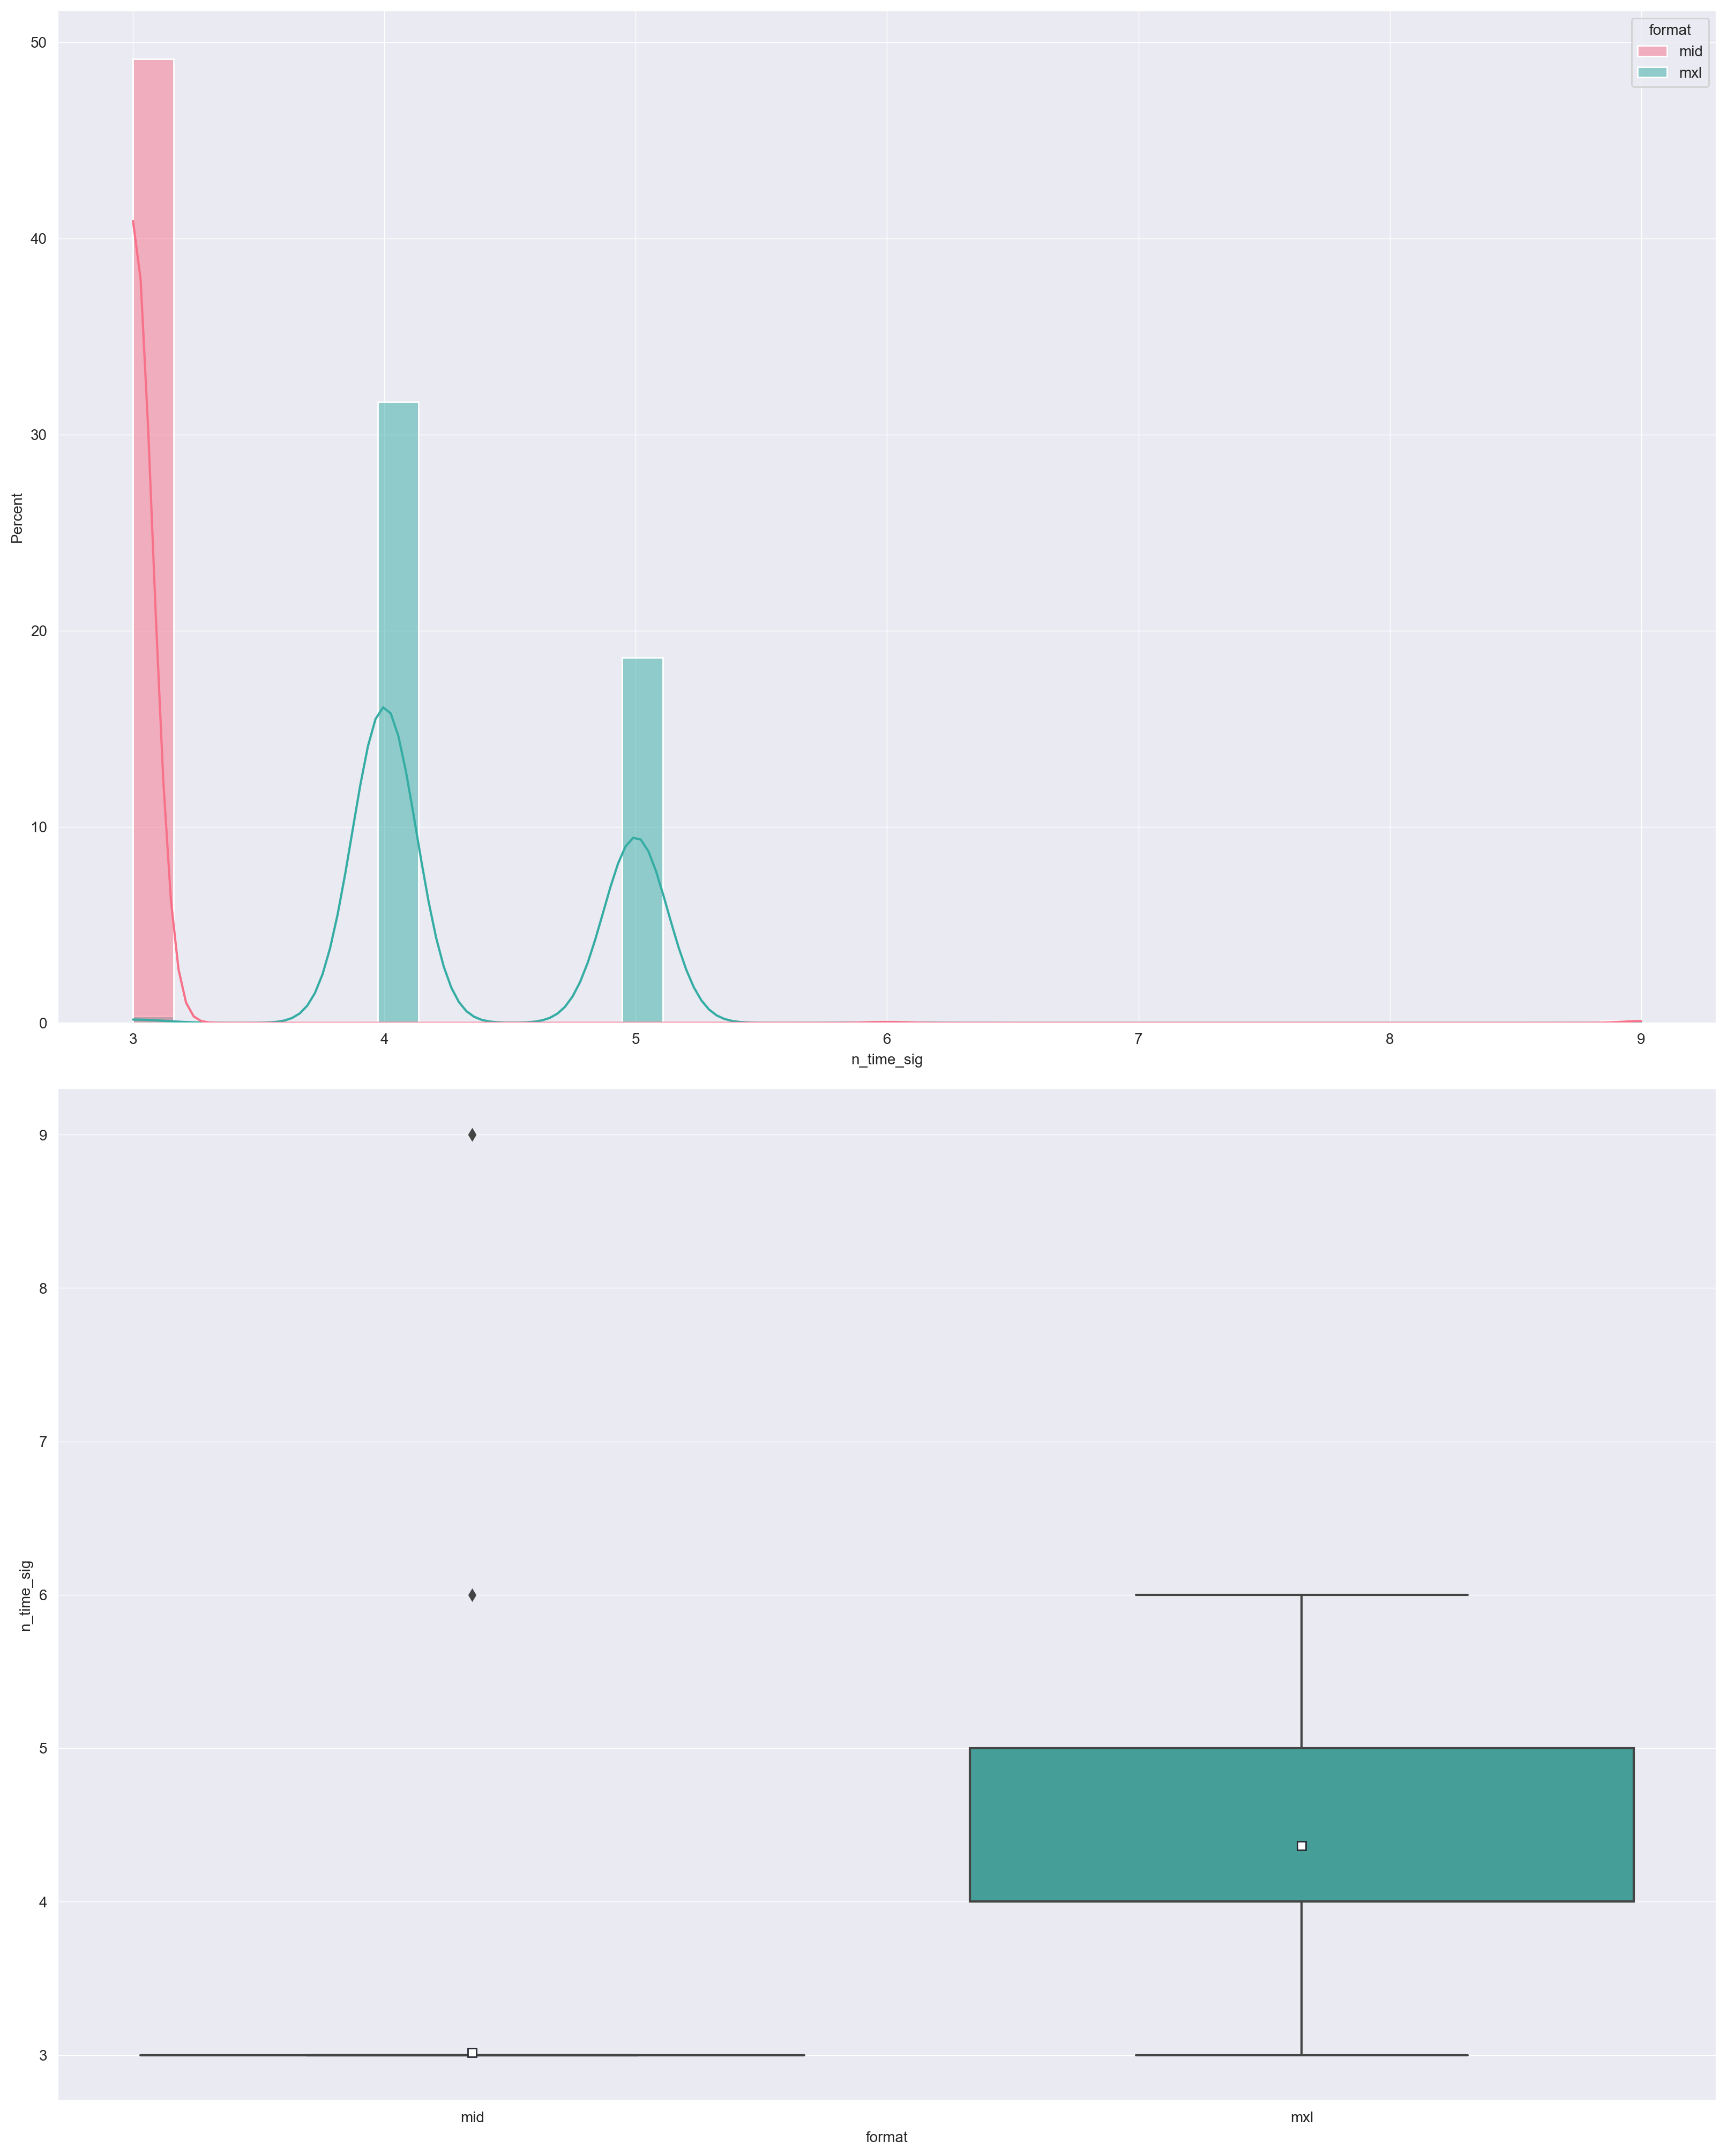

In [6]:
_, counts = side_by_side_plot(df=df, aspect='n_time_sig')
counts



 #### #Key Signature

POP909 is probably high in quality, so hard to draw conclusions.


format   
mid     0    752
        3    133
mxl     4    568
        5    334
        3      6
        6      1
Name: n_key_sig, dtype: int64

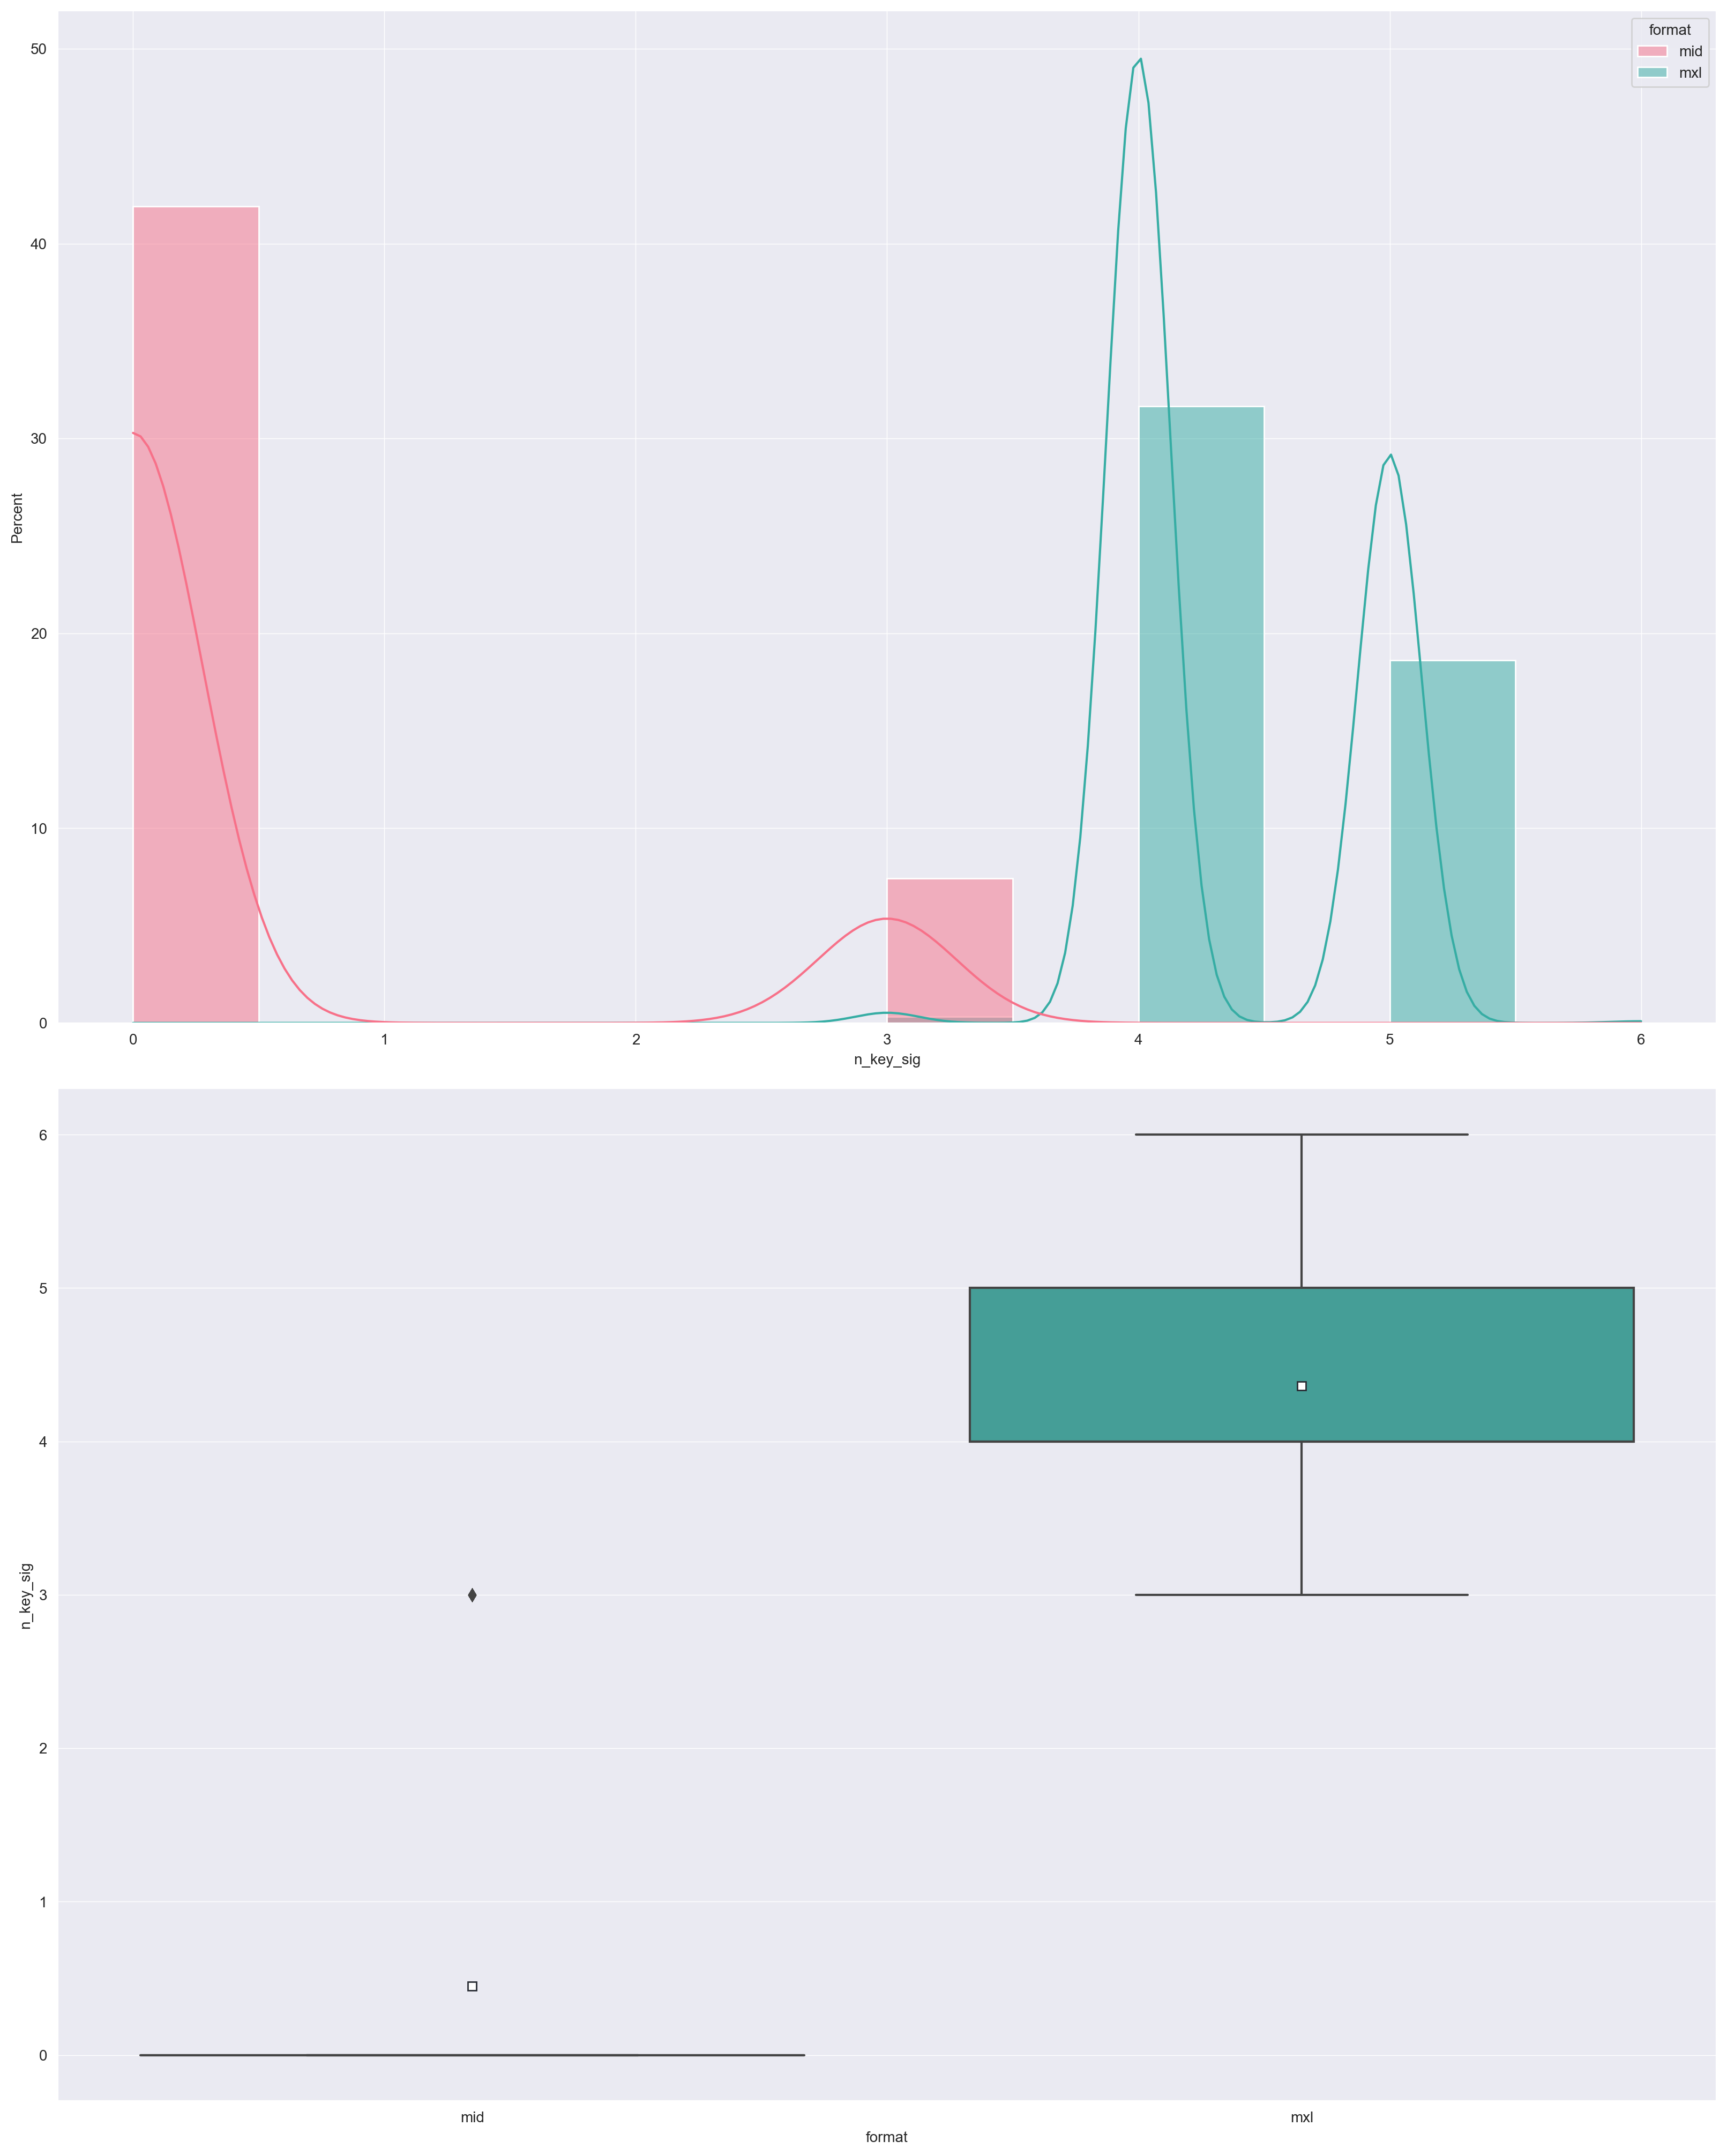

In [7]:
_, counts = side_by_side_plot(df=df, aspect='n_key_sig')
counts



#### #Tempo

`midi` files has much more tempo changes, so MuseScore `MXL` conversion help clean up the data.



format     
mid     3      544
        9       43
        15      31
        18      24
        12      19
        21      18
        24      17
        27      15
        45      14
        6       13
        48      11
        36      10
        30       8
        39       8
        60       8
        33       8
        66       6
        57       6
        54       6
        90       5
        78       4
        63       4
        42       4
        51       4
        84       3
        87       3
        105      3
        96       3
        69       3
        117      2
        246      2
        129      2
        186      2
        81       2
        288      1
        303      1
        120      1
        141      1
        318      1
        99       1
        72       1
        153      1
        495      1
        207      1
        297      1
        276      1
        219      1
        108      1
        366      1
        534      1
        126      1
        156      1


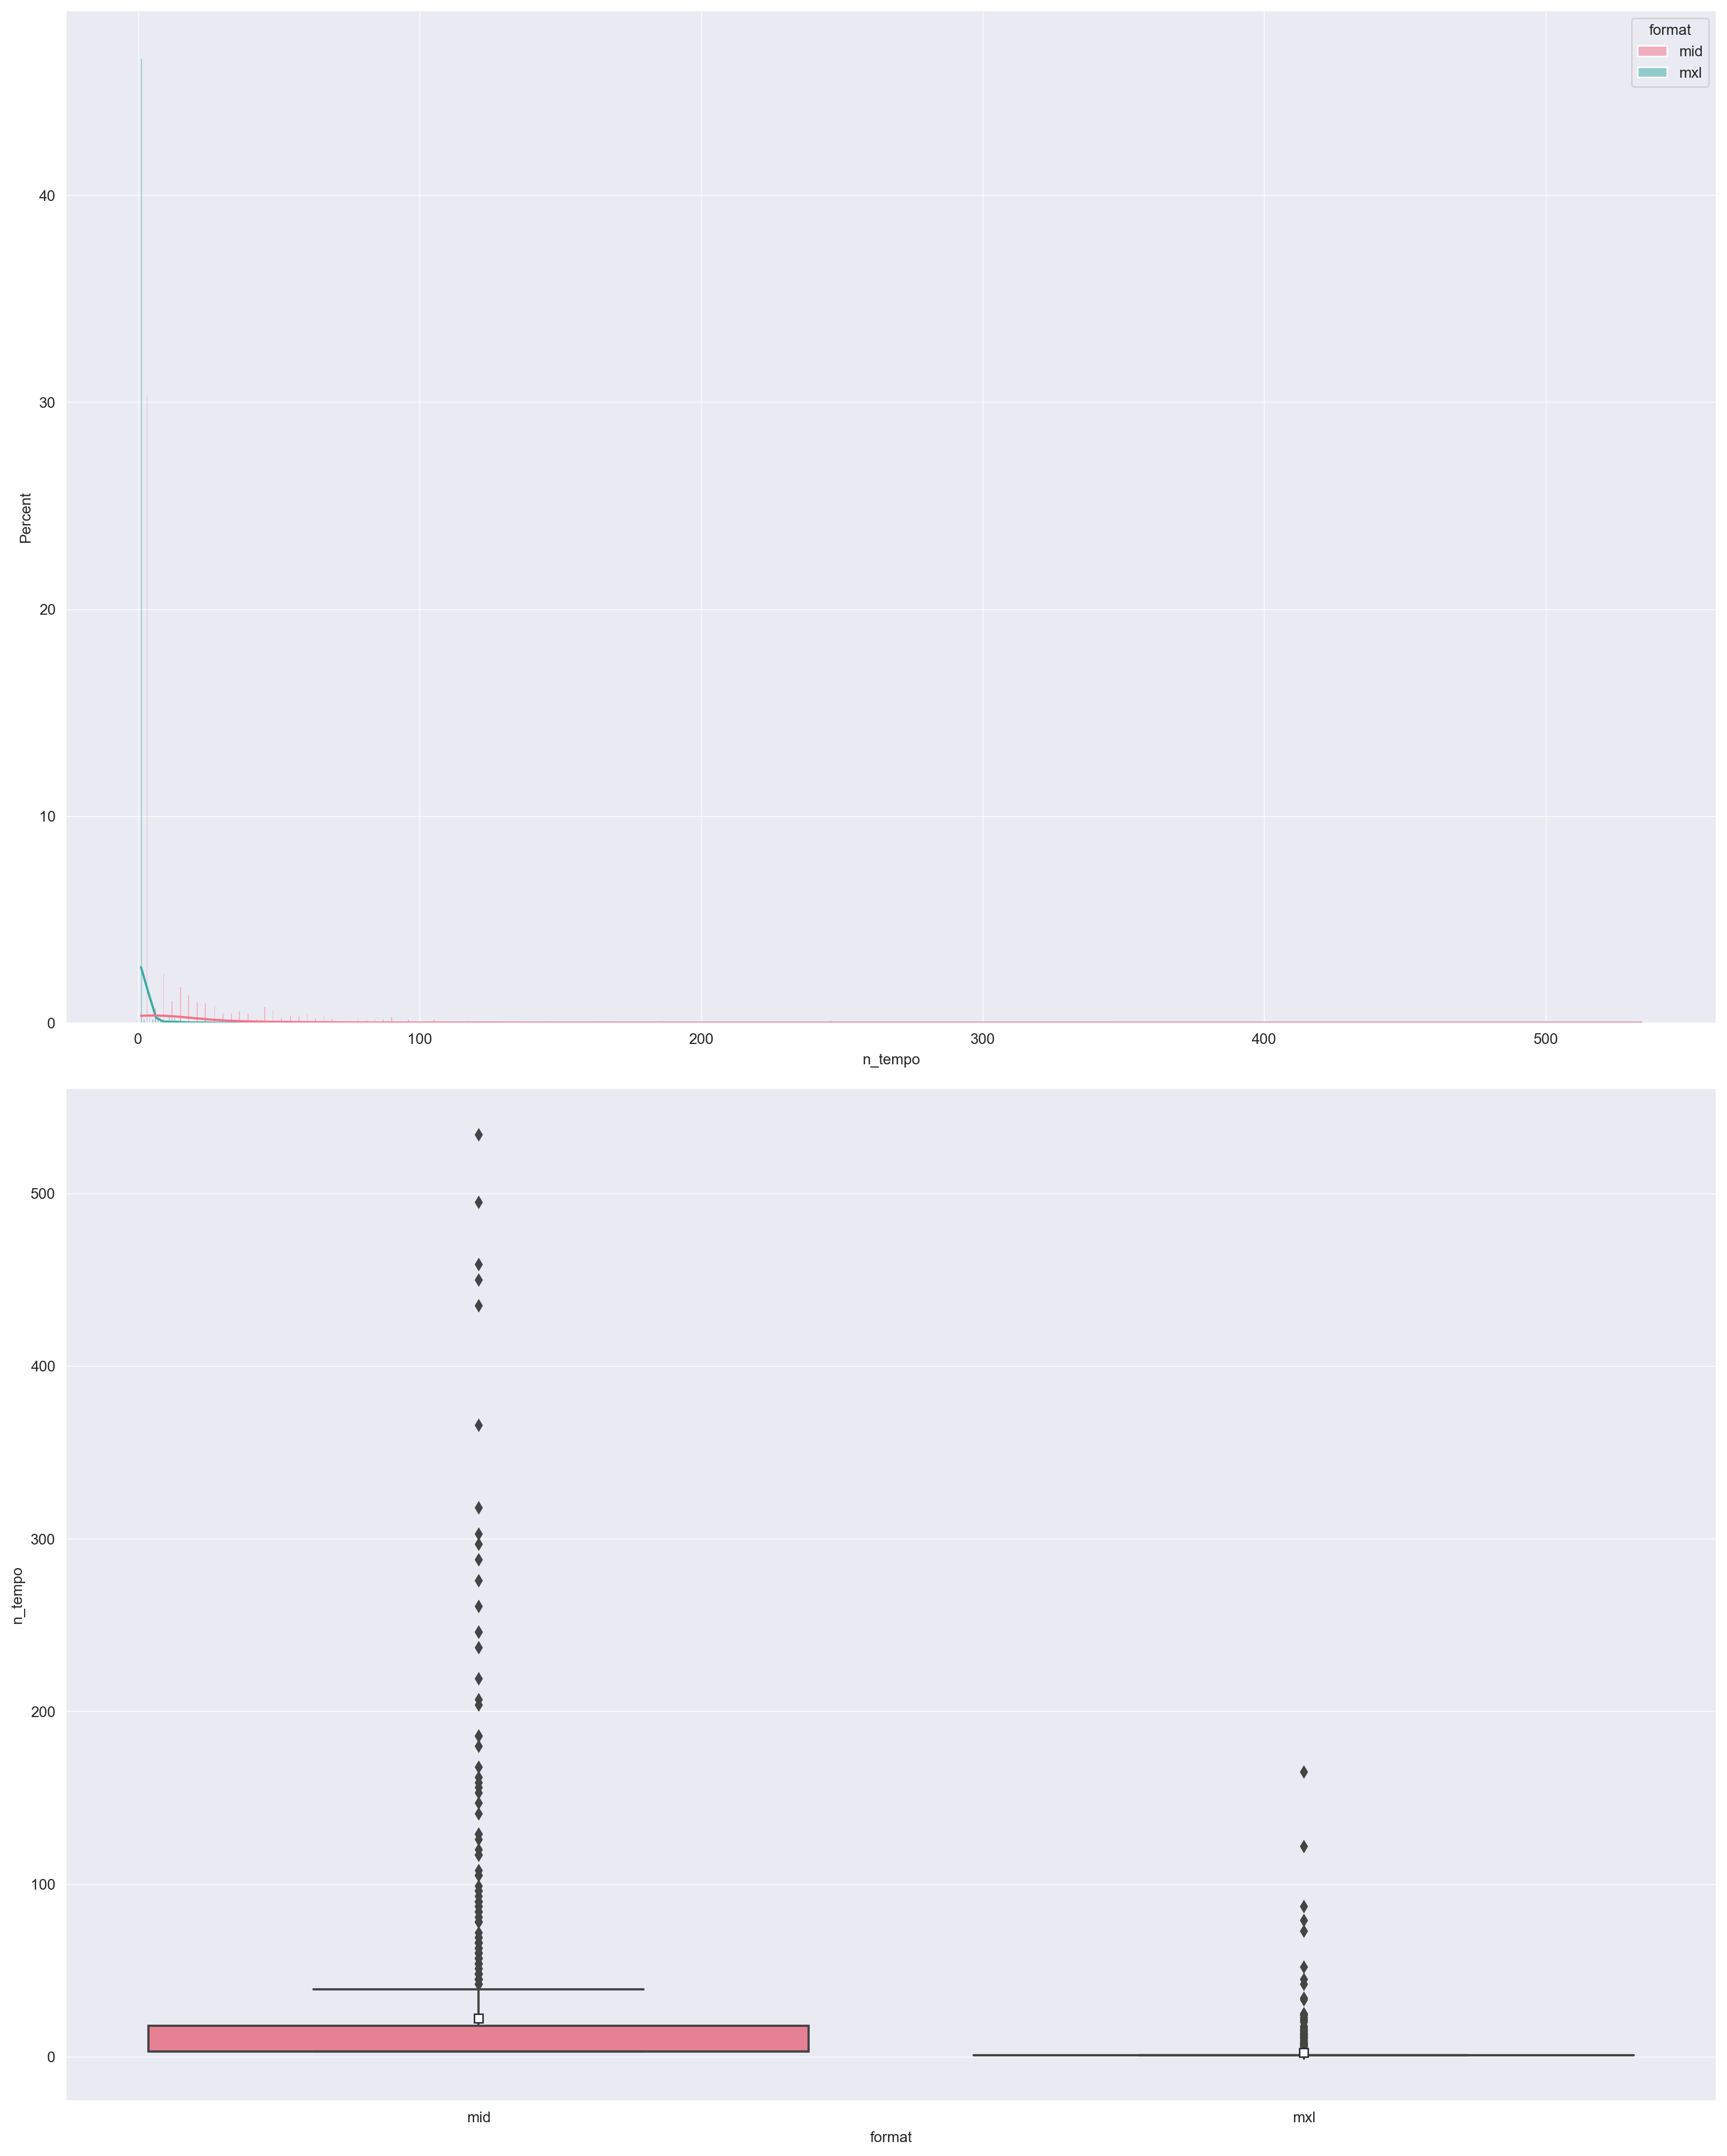

In [8]:
_, counts = side_by_side_plot(df=df, aspect='n_tempo')
counts



#### #Bar

`MXL` files have slightly more measures.


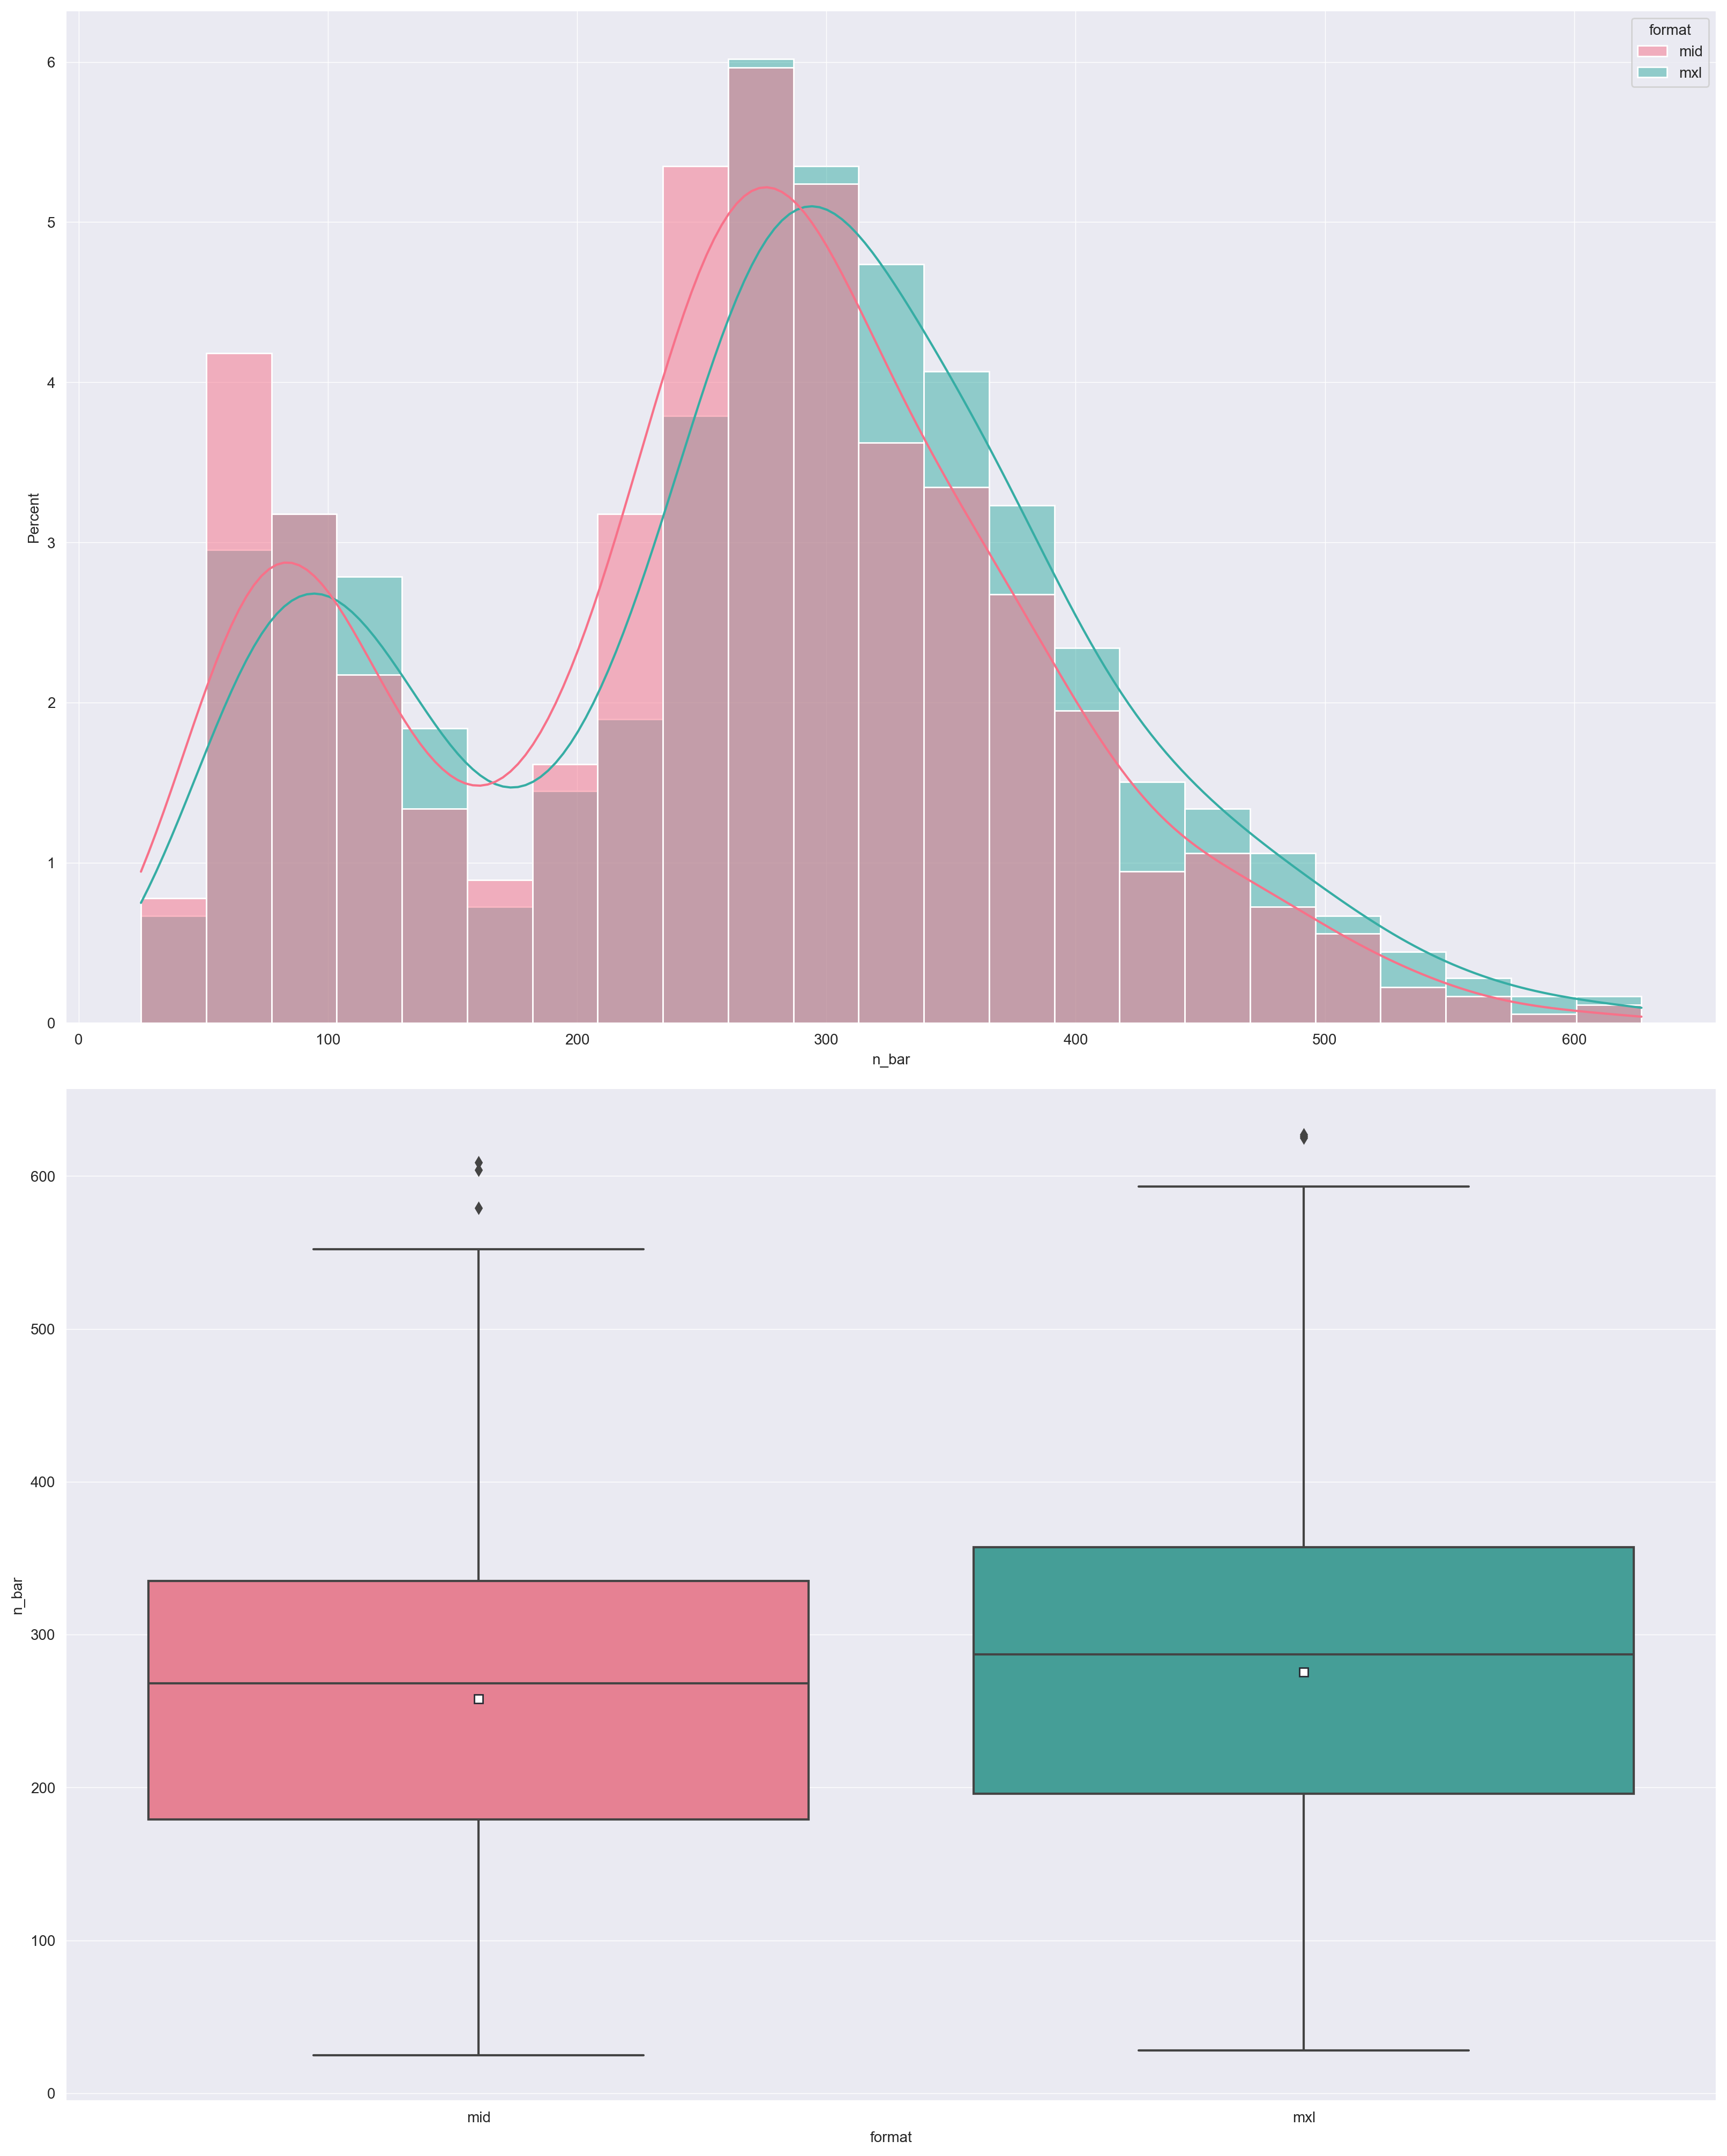

In [9]:
side_by_side_plot(df=df, aspect='n_bar');



#### Note durations

Many longer durations in `midi` files are cropped in `mxl` files.


,durations_note,count,format
0,1.5,11966,mid
1,3.25,2012,mid
2,0.25,489231,mid
3,0.5,289257,mid
4,4.0,861,mid
5,1.0,186347,mid
6,2.0,6784,mid
7,0.75,135828,mid
8,1/3,243690,mid
9,3.0,3638,mid


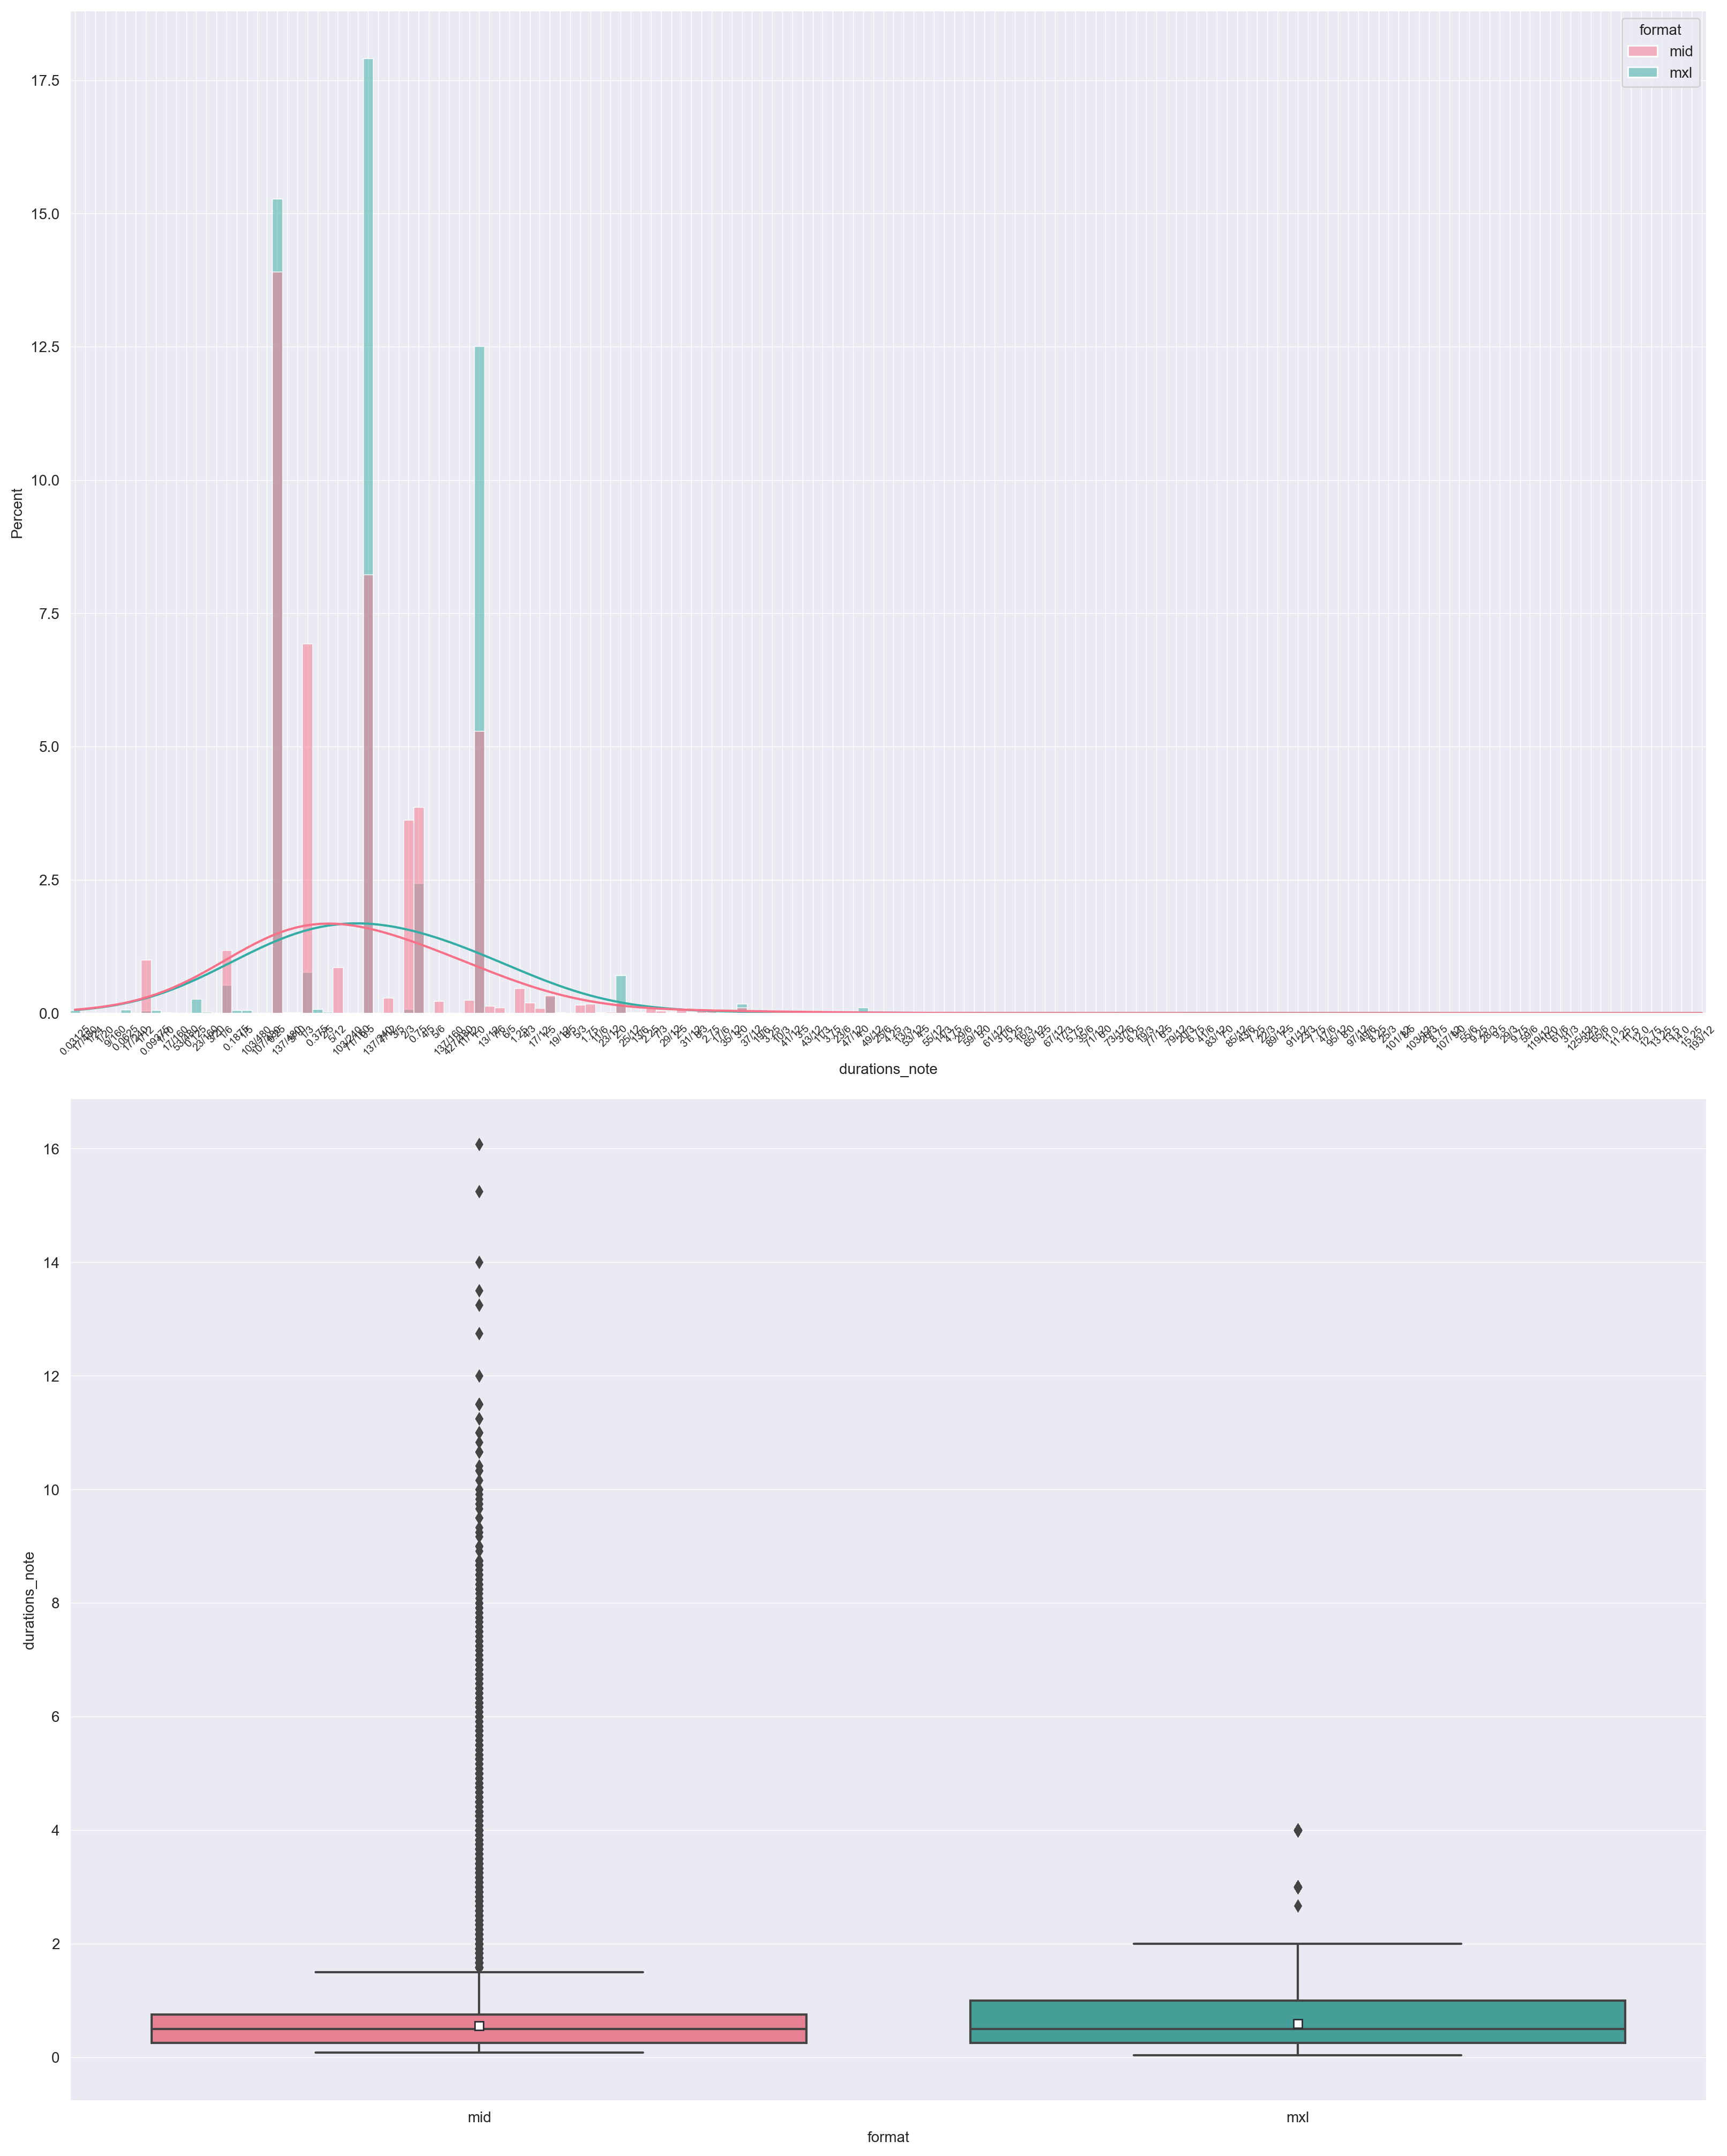

In [10]:
_, count = side_by_side_plot(df=df, aspect='durations_note')
count



#### Rest durations

`mxl` files are aligned to a more coarse grid compared to `midi` files.


,durations_rest,count,format
0,4.0,9590,mid
1,0.75,85123,mid
2,0.25,270609,mid
3,0.5,98430,mid
4,1.0,130562,mid
5,2.5,1480,mid
6,1.25,5148,mid
7,19/6,140,mid
8,3.25,1148,mid
9,31/12,101,mid


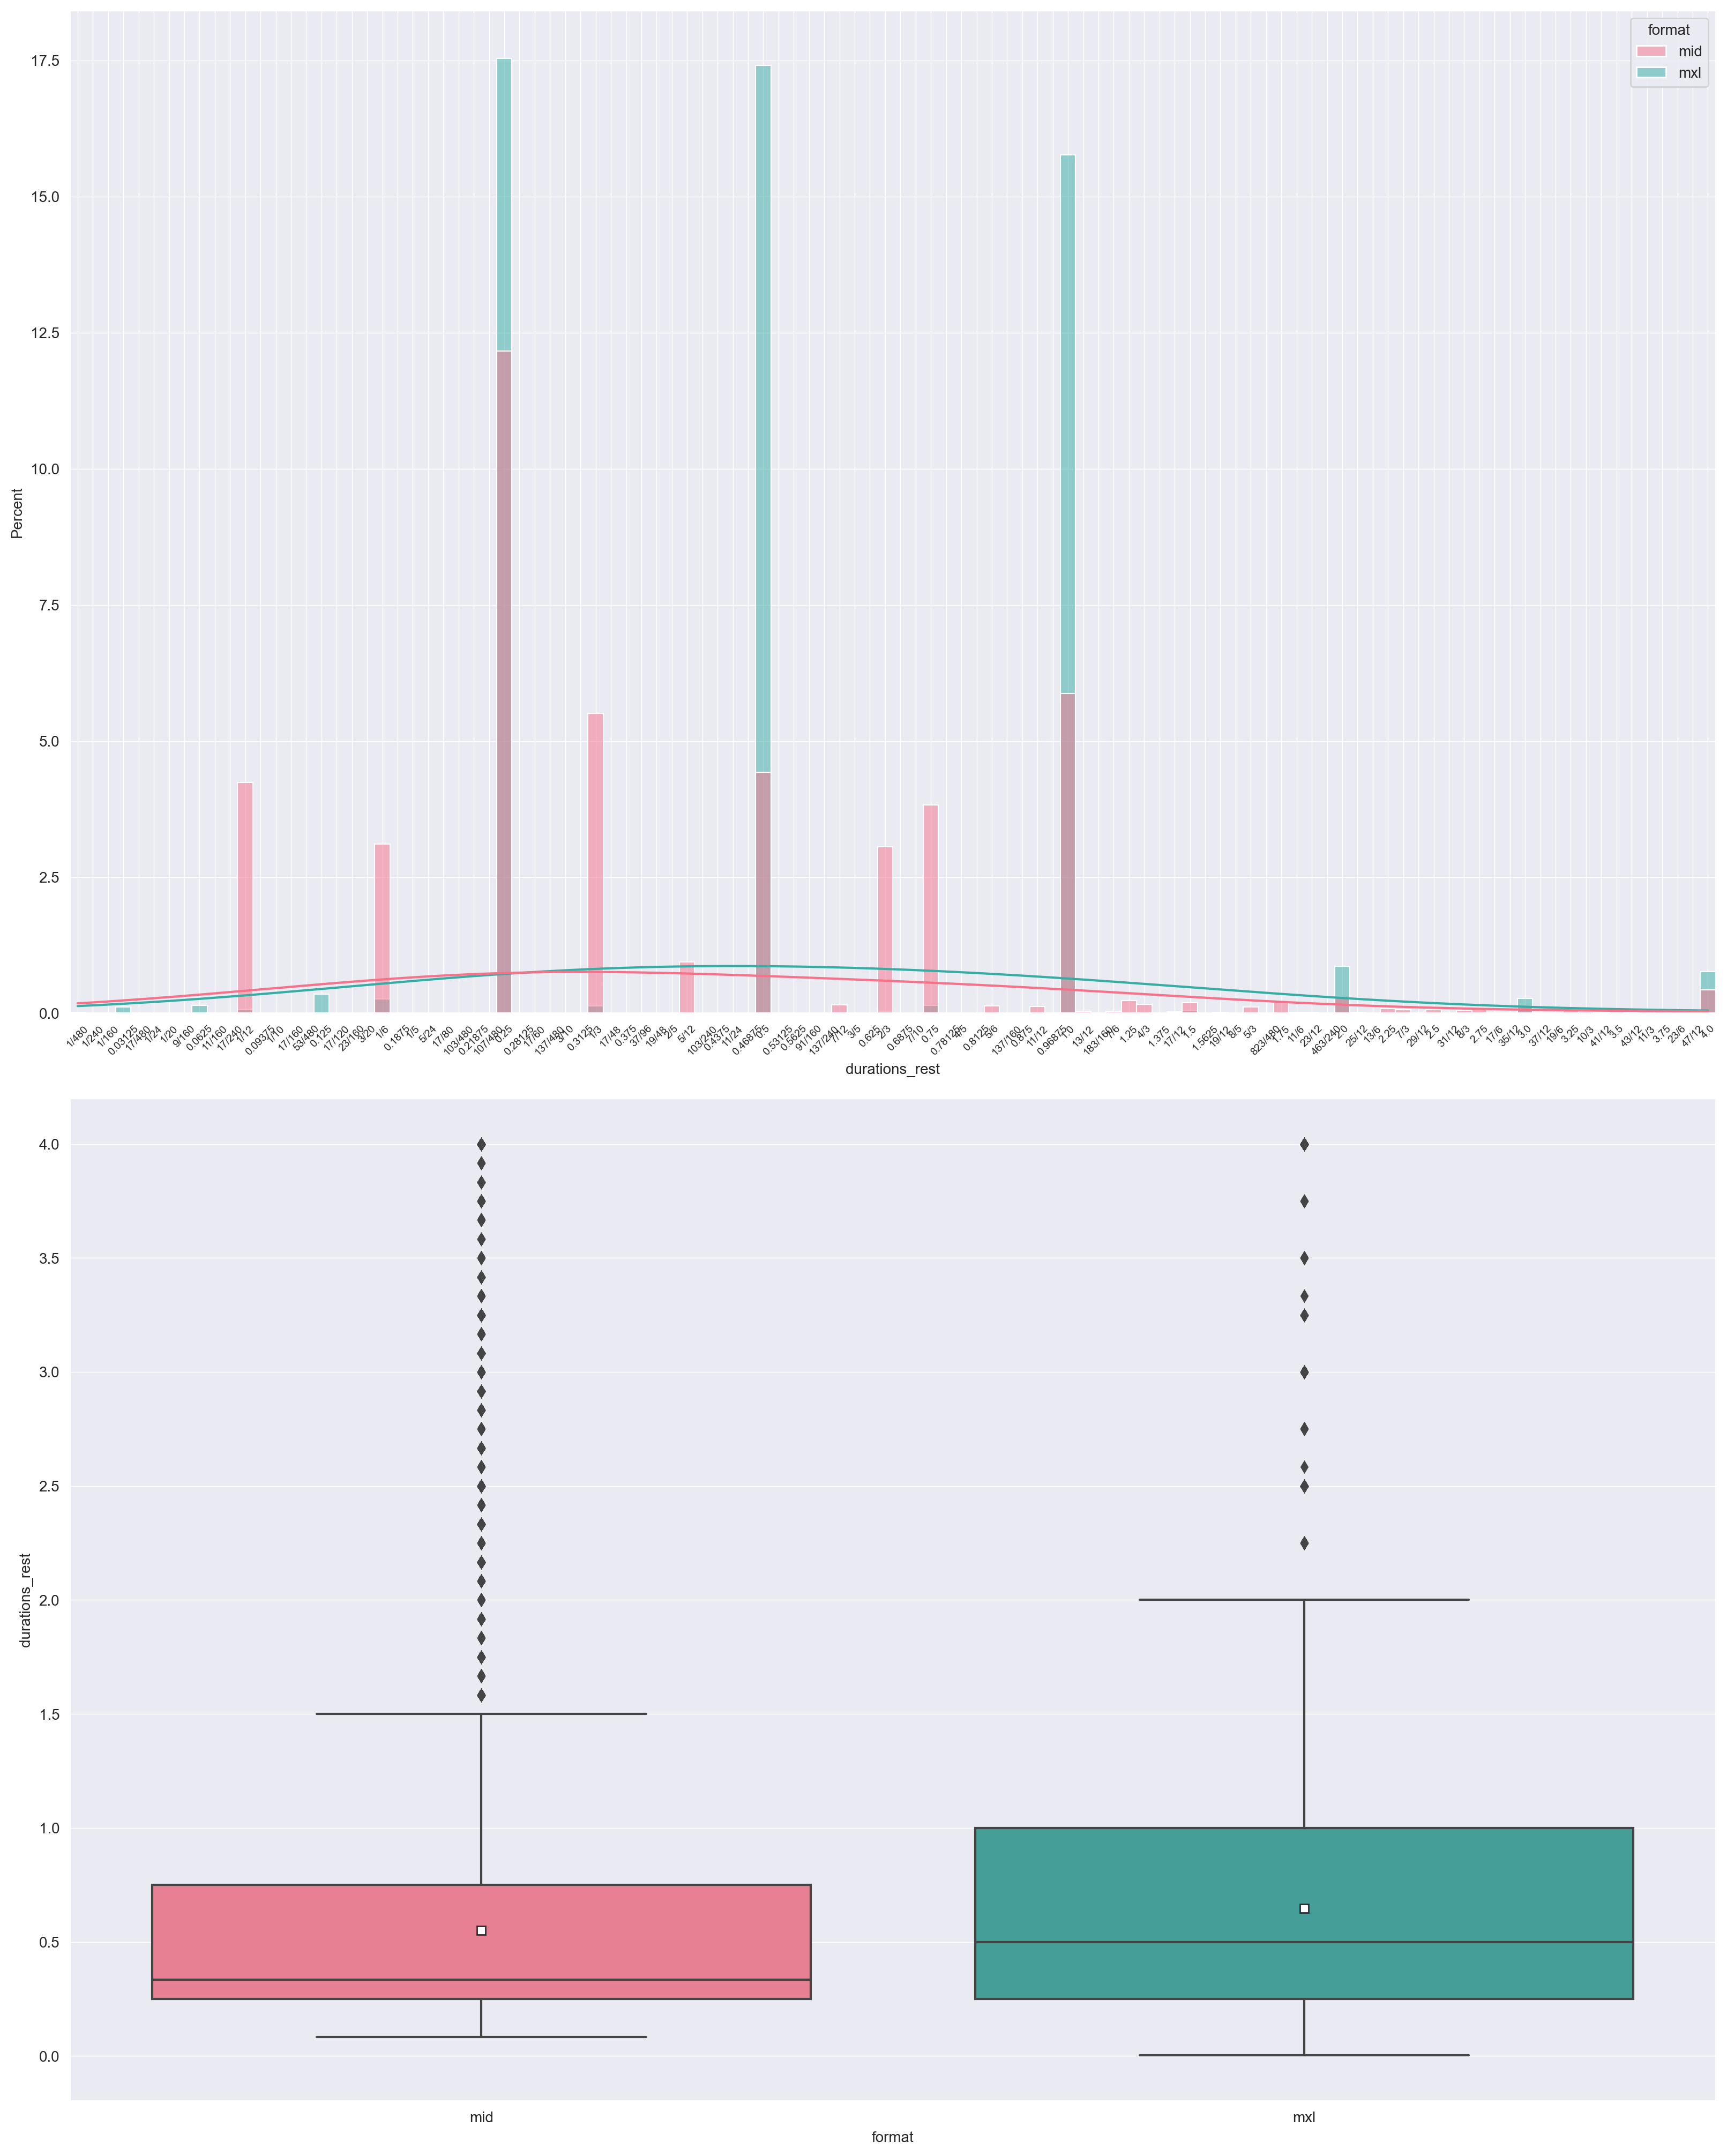

In [11]:
_, count = side_by_side_plot(df=df, aspect='durations_rest')
count

